In [1]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit, execute
from qiskit import Aer, IBMQ
import qiskit
import scipy.linalg as linalg
import numpy as np
import json
from scipy.linalg import expm
from numpy import pi as pi
import math
import matplotlib.pyplot as plt
import random
import sys
import gvar as gv
import lsqfit

In [2]:

import matplotlib.pyplot as plt
import matplotlib as mpl
colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (240, 228, 66), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]

fmts = ['o', 'd', 's', '^', '<', '8', '6', 'd', 'x']
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"

In [3]:
IBMQ.save_account('21fc925c651c9dfa502b200726935702e51579ecd19c0644e284df58209412fb3e994ee059d1a93d9ac8ad79ce4fe753d2522f12a0a2a8265ac66a501609c757', overwrite=True)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-research', group='fermilab-1', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-research', group='fermilab-2', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>]

In [5]:
# provider = IBMQ.get_provider(hub='ibm-q-research', group='fermilab-2', project='main')
# provider = IBMQ.get_provider(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

# Choose which data to run in cells below, then run all cells including and after the count extraction:

In [6]:
jobs = {}
counts = {}
ddjobs0 = {}
ddcounts0 = {}
ddjobs1 = {}
ddcounts1 = {}
ddjobs2 = {}
ddcounts2 = {}
nptjobs = {}
nptcounts = {}

nt = 20

keys = [('manilla', (3, 2, 4)), ('manilla', (1, 0, 2)), ('quito', (3, 2, 4)), ('quito', (1, 0, 2))]

for key in keys:
    jobs[key] = []
    ddjobs0[key] = []
    ddcounts0[key] = []
    ddjobs1[key] = []
    ddcounts1[key] = []
    ddjobs2[key] = []
    ddcounts2[key] = []
    counts[key] = []
    nptjobs[key] = []
    nptcounts[key] = []
    


backend = provider.get_backend('ibmq_manila')
jobs[keys[0]].append(backend.retrieve_job('62ebd24a3773485093ab65c8'))
jobs[keys[0]].append(backend.retrieve_job('62ebd24fcb37f788139bd03b'))
ddjobs0[keys[0]].append(backend.retrieve_job('62ebd254cb37f773669bd03d')) #CPMG
ddjobs0[keys[0]].append(backend.retrieve_job('62ebd26137734843f4ab65cc'))
ddjobs1[keys[0]].append(backend.retrieve_job('62ebe4f7577aab89b84a7631')) #XY4
ddjobs1[keys[0]].append(backend.retrieve_job('62ebe502cb37f7e7eb9bd0ee'))
ddjobs2[keys[0]].append(backend.retrieve_job('62ebe531577aabb7e24a7633')) #EDD
ddjobs2[keys[0]].append(backend.retrieve_job('62ebe53c0be8beb3c85a3e74'))
nptjobs[keys[0]].append(backend.retrieve_job('62ebe551524e0df26be4999c'))


jobs[keys[1]].append(backend.retrieve_job('62e8304fac90f782eec861e2'))
jobs[keys[1]].append(backend.retrieve_job('62e8305e5923b64a5a5f6bfc'))
ddjobs0[keys[1]].append(backend.retrieve_job('62e8307b37e42fcaa4aecc65')) #CPMG
ddjobs0[keys[1]].append(backend.retrieve_job('62e83089ac90f77d3fc861e3'))
ddjobs1[keys[1]].append(backend.retrieve_job('62e84c19f64a3923b736db35')) #XY4
ddjobs1[keys[1]].append(backend.retrieve_job('62e84c3815d033b5a7499e24'))
ddjobs2[keys[1]].append(backend.retrieve_job('62e84c4122b5f524ba5685c5')) #EDD
ddjobs2[keys[1]].append(backend.retrieve_job('62e84c4d37e42f3f8aaecd4f'))
nptjobs[keys[1]].append(backend.retrieve_job('62e84c56fb9fa179efa34969'))


backend = provider.get_backend('ibmq_quito')
jobs[keys[2]].append(backend.retrieve_job('62e183555593a8b2e71929a0'))
jobs[keys[2]].append(backend.retrieve_job('62e1835c85270c935fbaff4f'))
ddjobs0[keys[2]].append(backend.retrieve_job('62e18361ac90f7fa29c8379e')) #CPMG
ddjobs0[keys[2]].append(backend.retrieve_job('62e1836b5593a833741929a1'))
ddjobs1[keys[2]].append(backend.retrieve_job('62e186355923b698d15f4282')) #XY4
ddjobs1[keys[2]].append(backend.retrieve_job('62e1864dfb9fa12810a31ebf'))
ddjobs2[keys[2]].append(backend.retrieve_job('62e18656fb9fa1841aa31ec0')) #EDD
ddjobs2[keys[2]].append(backend.retrieve_job('62e1865e5923b6b6f55f4283'))
nptjobs[keys[2]].append(backend.retrieve_job('62e1866e5593a8ded91929c2'))


jobs[keys[3]].append(backend.retrieve_job('62e165ce3bc0413929fd6e15'))
jobs[keys[3]].append(backend.retrieve_job('62e165df22b5f54196565a86'))
ddjobs0[keys[3]].append(backend.retrieve_job('62e165e85593a81b151928d9')) #CPMG
ddjobs0[keys[3]].append(backend.retrieve_job('62e165ee5593a81c8e1928da'))
ddjobs1[keys[3]].append(backend.retrieve_job('62e170455593a847d1192948')) #XY4
ddjobs1[keys[3]].append(backend.retrieve_job('62e170505593a84ea6192949'))
ddjobs2[keys[3]].append(backend.retrieve_job('62e1705b3e2c287fd1bd2288')) #EDD
ddjobs2[keys[3]].append(backend.retrieve_job('62e170643e2c284884bd2289'))
nptjobs[keys[3]].append(backend.retrieve_job('62e170ad8fc09731dc0a88b2'))

In [7]:
for key in jobs.keys():
    job = ddjobs0[key][0]
    print('=' * 100)
    print(key)
    print('CPMG:   ', job.creation_date())
    job = ddjobs1[key][0]
    print('XY4:    ', job.creation_date())
    job = ddjobs2[key][0]
    print('EED:    ', job.creation_date())

('manilla', (3, 2, 4))
CPMG:    2022-08-04 09:06:12.373000-05:00
XY4:     2022-08-04 10:25:43.191000-05:00
EED:     2022-08-04 10:26:41.167000-05:00
('manilla', (1, 0, 2))
CPMG:    2022-08-01 14:58:51.458000-05:00
XY4:     2022-08-01 16:56:38.063000-05:00
EED:     2022-08-01 16:57:21.639000-05:00
('quito', (3, 2, 4))
CPMG:    2022-07-27 13:26:41.674000-05:00
XY4:     2022-07-27 13:38:45.475000-05:00
EED:     2022-07-27 13:39:18.328000-05:00
('quito', (1, 0, 2))
CPMG:    2022-07-27 11:20:56.331000-05:00
XY4:     2022-07-27 12:05:09.529000-05:00
EED:     2022-07-27 12:05:31.740000-05:00


# Count extraction and other data prep code for making plots:

In [8]:
for key in jobs.keys():
    for i in range(len(jobs[key])):
        print(i)
        for j in range(100):
            try:
                counts[key].append(jobs[key][i].result().get_counts(j))
            except:
                continue

            try:
                ddcounts0[key].append(ddjobs0[key][i].result().get_counts(j))
            except:
                continue

            try:
                ddcounts1[key].append(ddjobs1[key][i].result().get_counts(j))
            except:
                continue

            try:
                ddcounts2[key].append(ddjobs2[key][i].result().get_counts(j))
            except:
                continue

            try:
                nptcounts[key].append(nptjobs[key][i].result().get_counts(j))
            except:
                continue

0
1
0
1
0
1
0
1


In [9]:
ntwirls = 5
eps = 0.4
nt = int(8/eps)
nshots = 4096


countsavg = {}
ddcountsavg0 = {}
ddcountsavg1 = {}
ddcountsavg2 = {}
nptcountsavg = {}

scountsavg = {}
sddcountsavg0 = {}
sddcountsavg1 = {}
sddcountsavg2 = {}
    
for keyrun in keys:
    ncirccounts = np.zeros((ntwirls, nt))
    sncirccounts = np.zeros((ntwirls, nt))

    ddncirccounts0 = np.zeros((ntwirls, nt))
    sddncirccounts0 = np.zeros((ntwirls, nt))

    ddncirccounts1 = np.zeros((ntwirls, nt))
    sddncirccounts1 = np.zeros((ntwirls, nt))

    ddncirccounts2 = np.zeros((ntwirls, nt))
    sddncirccounts2 = np.zeros((ntwirls, nt))

    nptncirccounts = np.zeros((ntwirls, nt))
    index = 0
    indexnpt = 0


    for j in range(ntwirls):

        for i in range(nt):

            newcounts = counts[keyrun][index]
            ddnewcounts0 = ddcounts0[keyrun][index]
            ddnewcounts1 = ddcounts1[keyrun][index]
            ddnewcounts2 = ddcounts2[keyrun][index]
            nptnewcounts = nptcounts[keyrun][indexnpt]
            index += 1
            indexnpt += 1

            snewcounts = counts[keyrun][index]
            sddnewcounts0 = ddcounts0[keyrun][index]
            sddnewcounts1 = ddcounts1[keyrun][index]
            sddnewcounts2 = ddcounts2[keyrun][index]
            index += 1

            for key in newcounts.keys():
                    if (sum([int(i) for i in key]) % 2) == 0:
                        ncirccounts[j, i] += newcounts[key] / nshots
                    else:
                        ncirccounts[j, i] -= newcounts[key] / nshots

            for key in ddnewcounts0.keys():
                    if (sum([int(i) for i in key]) % 2) == 0:
                        ddncirccounts0[j, i] += ddnewcounts0[key] / nshots
                    else:
                        ddncirccounts0[j, i] -= ddnewcounts0[key] / nshots

            for key in ddnewcounts1.keys():
                    if (sum([int(i) for i in key]) % 2) == 0:
                        ddncirccounts1[j, i] += ddnewcounts1[key] / nshots
                    else:
                        ddncirccounts1[j, i] -= ddnewcounts1[key] / nshots

            for key in ddnewcounts2.keys():
                    if (sum([int(i) for i in key]) % 2) == 0:
                        ddncirccounts2[j, i] += ddnewcounts2[key] / nshots
                    else:
                        ddncirccounts2[j, i] -= ddnewcounts2[key] / nshots

            for key in nptnewcounts.keys():
                    if (sum([int(i) for i in key]) % 2) == 0:
                        nptncirccounts[j, i] += nptnewcounts[key] / nshots
                    else:
                        nptncirccounts[j, i] -= nptnewcounts[key] / nshots



            ###############SCALING################

            for key in snewcounts.keys():
                    if (sum([int(i) for i in key]) % 2) == 0:
                        sncirccounts[j, i] += snewcounts[key] / nshots
                    else:
                        sncirccounts[j, i] -= snewcounts[key] / nshots

            for key in sddnewcounts0.keys():
                    if (sum([int(i) for i in key]) % 2) == 0:
                        sddncirccounts0[j, i] += sddnewcounts0[key] / nshots
                    else:
                        sddncirccounts0[j, i] -= sddnewcounts0[key] / nshots

            for key in sddnewcounts1.keys():
                    if (sum([int(i) for i in key]) % 2) == 0:
                        sddncirccounts1[j, i] += sddnewcounts1[key] / nshots
                    else:
                        sddncirccounts1[j, i] -= sddnewcounts1[key] / nshots

            for key in sddnewcounts2.keys():
                    if (sum([int(i) for i in key]) % 2) == 0:
                        sddncirccounts2[j, i] += sddnewcounts2[key] / nshots
                    else:
                        sddncirccounts2[j, i] -= sddnewcounts2[key] / nshots




    countsavg[keyrun] = gv.gvar(np.mean(ncirccounts, axis=0), np.std(ncirccounts, axis=0) / np.sqrt(ntwirls))
    ddcountsavg0[keyrun] = gv.gvar(np.mean(ddncirccounts0, axis=0), np.std(ddncirccounts0, axis=0) / np.sqrt(ntwirls))
    ddcountsavg1[keyrun] = gv.gvar(np.mean(ddncirccounts1, axis=0), np.std(ddncirccounts1, axis=0) / np.sqrt(ntwirls))
    ddcountsavg2[keyrun] = gv.gvar(np.mean(ddncirccounts2, axis=0), np.std(ddncirccounts2, axis=0) / np.sqrt(ntwirls))
    nptcountsavg[keyrun] = gv.gvar(np.mean(nptncirccounts, axis=0), np.std(nptncirccounts, axis=0) / np.sqrt(ntwirls))

    scountsavg[keyrun] = gv.gvar(np.mean(sncirccounts, axis=0), np.std(sncirccounts, axis=0) / np.sqrt(ntwirls))
    sddcountsavg0[keyrun] = gv.gvar(np.mean(sddncirccounts0, axis=0), np.std(sddncirccounts0, axis=0) / np.sqrt(ntwirls))
    sddcountsavg1[keyrun] = gv.gvar(np.mean(sddncirccounts1, axis=0), np.std(sddncirccounts1, axis=0) / np.sqrt(ntwirls))
    sddcountsavg2[keyrun] = gv.gvar(np.mean(sddncirccounts2, axis=0), np.std(sddncirccounts2, axis=0) / np.sqrt(ntwirls))

In [10]:
runcountsavg = {}
runcountsddavg0 = {}
runcountsddavg1 = {}
runcountsddavg2 = {}

scaledcountsavg = {}
scaledddcountsavg0 = {}
scaledddcountsavg1 = {}
scaledddcountsavg2 = {}

rescaledcountsavg = {}
rescaledddcountsavg0 = {}
rescaledddcountsavg1 = {}
rescaledddcountsavg2 = {}

for key in keys:
    runcountsavg[key] = countsavg[key]
    runcountsddavg0[key] = ddcountsavg0[key]
    runcountsddavg1[key] = ddcountsavg1[key]
    runcountsddavg2[key] = ddcountsavg2[key]
    
    
    rescaledcountsavg[key] = countsavg[key]/scountsavg[key]
    rescaledddcountsavg0[key] = ddcountsavg0[key]/sddcountsavg0[key]
    rescaledddcountsavg1[key] = ddcountsavg1[key]/sddcountsavg1[key]
    rescaledddcountsavg2[key] = ddcountsavg2[key]/sddcountsavg2[key]

    scaledcountsavg[key] = scountsavg[key]
    scaledddcountsavg0[key] = sddcountsavg0[key]
    scaledddcountsavg1[key] = sddcountsavg1[key]
    scaledddcountsavg2[key] = sddcountsavg2[key]


Least Square Fit:
  chi2/dof [dof] = 0.87 [20]    Q = 0.63    logGBF = 32.653

Parameters:
            A_1    0.581 (70)     [  0.0 (1.0) ]  
            B_1   0.1137 (72)     [  0.0 (1.0) ]  
            C_1    0.070 (43)     [  0.0 (3.1) ]  
            E_1    0.034 (63)     [  0.0 (1.0) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 12/0.0)
  fitter = scipy_least_squares    method = trf
 Least Square Fit:
  chi2/dof [dof] = 2.2 [20]    Q = 0.0016    logGBF = 13.738

Parameters:
            A_1     0.64 (10)     [  0.0 (1.0) ]  
            B_1    0.117 (11)     [  0.0 (1.0) ]  
            C_1    0.069 (58)     [  0.0 (3.1) ]  
            E_1   -0.010 (91)     [  0.0 (1.0) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 13/0.0)
  fitter = scipy_least_squares    method = trf
 Least Square Fit:
  chi2/dof [dof] = 1.6 [20]    Q = 0.041    logGBF = 24.105

Parameters:
            A_1   0.529 (47)     [  0.0 (1.0) ]  


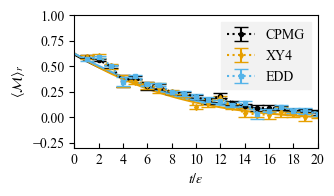

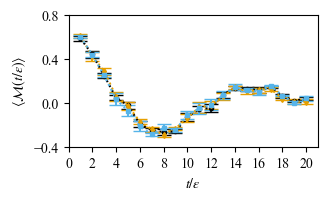

In [48]:
nt = 20
key = keys[3]

# plt.annotate()
fig1, ax1 = plt.subplots(ncols=1, nrows=1)
fig2, ax2 = plt.subplots(ncols=1, nrows=1)
ax = [ax1, ax2]
fig.set_size_inches((3.375, 3.375 * 1.6))
def fcn(x, p):
    return p['A_1'] * gv.exp(-p['B_1'] * x) * gv.cos(p['C_1'] * x) + p['E_1']

prior = {'A_1': gv.BufferDict.uniform('f', -1, 1), 'B_1': gv.gvar(0, 1), 'C_1': gv.gvar(0, pi),
         'E_1': gv.BufferDict.uniform('f', -1, 1)}


fit0 = lsqfit.nonlinear_fit(data=(np.array(range(nt)), scaledddcountsavg0[key]),
                            fcn=fcn, prior=prior)

fit1 = lsqfit.nonlinear_fit(data=(np.array(range(nt)), scaledddcountsavg1[key]),
                            fcn=fcn, prior=prior)

fit2 = lsqfit.nonlinear_fit(data=(np.array(range(nt)), scaledddcountsavg2[key]),
                            fcn=fcn, prior=prior)

xpoints = np.linspace(0, 20, 100)
print(fit0, fit1, fit2)


ax[0].plot(xpoints, fcn(xpoints, gv.mean(fit0.p)), color=colors[0])

ax[0].plot(xpoints, fcn(xpoints, gv.mean(fit1.p)), color=colors[1])

ax[0].plot(xpoints, fcn(xpoints, gv.mean(fit2.p)), color=colors[2])

ax[0].errorbar(range(1, 1 + nt), gv.mean(scaledddcountsavg0[key][:nt]), yerr=gv.sdev(scaledddcountsavg0[key][:nt]), 
             fmt='o', linestyle=':', markersize=3, 
             label='CPMG', capsize=5, color=colors[0])
ax[0].errorbar(range(1, 1 + nt), gv.mean(scaledddcountsavg1[key][:nt]), yerr=gv.sdev(scaledddcountsavg1[key][:nt]), 
             fmt='d', linestyle=':', markersize=3, 
             label='XY4', capsize=5, color=colors[1])
ax[0].errorbar(range(1, 1 + nt), gv.mean(scaledddcountsavg2[key][:nt]), yerr=gv.sdev(scaledddcountsavg2[key][:nt]), 
             fmt='s', linestyle=':', markersize=3, 
             label='EDD', capsize=5, color=colors[2])


ax[1].errorbar(range(1, 1 + nt), gv.mean(runcountsddavg0[key][:nt]), yerr=gv.sdev(runcountsddavg0[key][:nt]), 
             fmt='o', linestyle=':', markersize=3, 
             label='CPMG', capsize=5, color=colors[0])
ax[1].errorbar(range(1, 1 + nt), gv.mean(runcountsddavg1[key][:nt]), yerr=gv.sdev(runcountsddavg1[key][:nt]), 
             fmt='d', linestyle=':', markersize=3, 
             label='XY4', capsize=5, color=colors[1])
ax[1].errorbar(range(1, 1 + nt), gv.mean(runcountsddavg2[key][:nt]), yerr=gv.sdev(runcountsddavg2[key][:nt]), 
             fmt='s', linestyle=':', markersize=3, 
             label='EDD', capsize=5, color=colors[2])


# plt.ylim([0,  1.1])
ax[0].set_ylim(-0.3, 1)
ax[0].set_yticks([-0.25, 0, 0.25, 0.5, 0.75, 1.0])
for axis in ax:
    axis.set_xlabel('$t / \epsilon$')
    axis.set_xticks(np.arange(0, nt + 2, step=2))  # Set label locations.
ax2.set_yticks([-0.4, 0, 0.4,  0.8])
backend = str(backend)
# plt.title('Meson Correlation Function: '+str(backend).replace('_',' ')+' '+str(itl_layout),size=15)
ax[0].set_ylabel(r'$\langle\mathcal{M}\rangle_{r}$')
ax[1].set_ylabel(r'$\langle\mathcal{M}(t/\epsilon)\rangle$')
# ax[0].annotate('CPMG: B = {}'.format(fit0.p['B_1']) + r'  $\tilde{\chi^2}= $' + str(np.round(fit0.chi2 / fit0.dof, decimals=2)),
#                (0.34, 0.95), verticalalignment='center', xycoords='axes fraction',
#                fontsize='small')

# ax[0].annotate('XY4: B = {}'.format(fit1.p['B_1']) + r'  $\tilde{\chi^2}= $' + str(np.round(fit1.chi2 / fit1.dof, decimals=2)),
#                (0.34, 0.85), verticalalignment='center', xycoords='axes fraction',
#                fontsize='small')

# ax[0].annotate('EDD: B = {}'.format(fit2.p['B_1']) + r'  $\tilde{\chi^2}= $' + str(np.round(fit2.chi2 / fit2.dof, decimals=2)),
#                (0.34, 0.75), verticalalignment='center', xycoords='axes fraction',
#                fontsize='small')
# ax[0].annotate('(a) rescaling', (0.34, 0.65), verticalalignment='center', xycoords='axes fraction', fontsize='small')
# ax[1].annotate('(b) time evolution', (0.34, 0.75), verticalalignment='center', xycoords='axes fraction', fontsize='small')
# ax[1].plot(np.linspace(0, 20, 21), np.cos(np.linspace(0, 20, 21) * 0.41),
#            color=colors[3], label='exact')
for fig in [fig1, fig2]:
    fig.set_size_inches((3.375, 3.375 / 1.6))
fig1.tight_layout()
fig2.tight_layout()
ax[0].tick_params(axis='x', direction='in')
ax[0].set_xlim(0, 20)
ax[0].legend(framealpha=1, shadow=False, edgecolor=(0.95, 0.95, 0.95),
           facecolor=(0.95, 0.95, 0.95), ncol=1, fancybox=False)
filename = f'{key[0]}qubits={key[1]}decouplingsequences'.replace(', ', '_').replace('(', '=').replace(')', '')
print(filename)
fig1.savefig(filename + 'suba.pdf')
fig2.savefig(filename + 'subb.pdf')

# ibmq_manila [3,2,4] CPMG,XY4,EDD 
calibrated 1 hr before running, 2,4 high freq.

Taken Aug 4, 2022

In [122]:
itl_layout = [3,2,4]
nt=20
jobs = {}
counts = []

ddjobs0 = {}
ddcounts0 = []

ddjobs1 = {}
ddcounts1 = []

ddjobs2 = {}
ddcounts2 = []

nptjobs = {}
nptcounts = []

backend = provider.get_backend('ibmq_manila')
jobs[0] = backend.retrieve_job('62ebd24a3773485093ab65c8')
jobs[1] = backend.retrieve_job('62ebd24fcb37f788139bd03b')
ddjobs0[0] = backend.retrieve_job('62ebd254cb37f773669bd03d') #CPMG
ddjobs0[1] = backend.retrieve_job('62ebd26137734843f4ab65cc')
ddjobs1[0] = backend.retrieve_job('62ebe4f7577aab89b84a7631') #XY4
ddjobs1[1] = backend.retrieve_job('62ebe502cb37f7e7eb9bd0ee')
ddjobs2[0] = backend.retrieve_job('62ebe531577aabb7e24a7633') #EDD
ddjobs2[1] = backend.retrieve_job('62ebe53c0be8beb3c85a3e74')
nptjobs[0] = backend.retrieve_job('62ebe551524e0df26be4999c')



# ibmq_manila [1,0,2] CPMG,XY4,EDD 
calibrated 40 mins before running, 2 high freq., cx 1->2 high err.

Taken Aug 1, 2022

In [69]:
itl_layout = [1,0,2]
nt=20
jobs = {}
counts = []

ddjobs0 = {}
ddcounts0 = []

ddjobs1 = {}
ddcounts1 = []

ddjobs2 = {}
ddcounts2 = []

nptjobs = {}
nptcounts = []

backend = provider.get_backend('ibmq_manila')
jobs[0] = backend.retrieve_job('62e8304fac90f782eec861e2')
jobs[1] = backend.retrieve_job('62e8305e5923b64a5a5f6bfc')
ddjobs0[0] = backend.retrieve_job('62e8307b37e42fcaa4aecc65') #CPMG
ddjobs0[1] = backend.retrieve_job('62e83089ac90f77d3fc861e3')
ddjobs1[0] = backend.retrieve_job('62e84c19f64a3923b736db35') #XY4
ddjobs1[1] = backend.retrieve_job('62e84c3815d033b5a7499e24')
ddjobs2[0] = backend.retrieve_job('62e84c4122b5f524ba5685c5') #EDD
ddjobs2[1] = backend.retrieve_job('62e84c4d37e42f3f8aaecd4f')
nptjobs[0] = backend.retrieve_job('62e84c56fb9fa179efa34969')

# ibmq_quito [1,0,2] CPMG,XY4,EDD

Taken Jul. 27, 2022

In [108]:
itl_layout = [1,0,2]
nt=20
jobs = {}
counts = []

ddjobs0 = {}
ddcounts0 = []

ddjobs1 = {}
ddcounts1 = []

ddjobs2 = {}
ddcounts2 = []

nptjobs = {}
nptcounts = []

backend = provider.get_backend('ibmq_quito')
jobs[0] = backend.retrieve_job('62e183555593a8b2e71929a0')
jobs[1] = backend.retrieve_job('62e1835c85270c935fbaff4f')
ddjobs0[0] = backend.retrieve_job('62e18361ac90f7fa29c8379e') #CPMG
ddjobs0[1] = backend.retrieve_job('62e1836b5593a833741929a1')
ddjobs1[0] = backend.retrieve_job('62e186355923b698d15f4282') #XY4
ddjobs1[1] = backend.retrieve_job('62e1864dfb9fa12810a31ebf')
ddjobs2[0] = backend.retrieve_job('62e18656fb9fa1841aa31ec0') #EDD
ddjobs2[1] = backend.retrieve_job('62e1865e5923b6b6f55f4283')
nptjobs[0] = backend.retrieve_job('62e1866e5593a8ded91929c2')

# ibmq_quito [3,2,4] CPMG,XY4,EDD

Taken Jul. 27, 2022

In [92]:
itl_layout = [3,2,4]
nt=20
jobs = {}
counts = []

ddjobs0 = {}
ddcounts0 = []

ddjobs1 = {}
ddcounts1 = []

ddjobs2 = {}
ddcounts2 = []

nptjobs = {}
nptcounts = []

backend = provider.get_backend('ibmq_quito')
jobs[0] = backend.retrieve_job('62e165ce3bc0413929fd6e15')
jobs[1] = backend.retrieve_job('62e165df22b5f54196565a86')
ddjobs0[0] = backend.retrieve_job('62e165e85593a81b151928d9') #CPMG
ddjobs0[1] = backend.retrieve_job('62e165ee5593a81c8e1928da')
ddjobs1[0] = backend.retrieve_job('62e170455593a847d1192948') #XY4
ddjobs1[1] = backend.retrieve_job('62e170505593a84ea6192949')
ddjobs2[0] = backend.retrieve_job('62e1705b3e2c287fd1bd2288') #EDD
ddjobs2[1] = backend.retrieve_job('62e170643e2c284884bd2289')
nptjobs[0] = backend.retrieve_job('62e170ad8fc09731dc0a88b2')

# Count extraction and other data prep code for making plots:

In [123]:
for i in range(len(jobs)):
    for j in range(100):
        try:
            counts.append(jobs[i].result().get_counts(j))
        except:
            continue
            
        try:
            ddcounts0.append(ddjobs0[i].result().get_counts(j))
        except:
            continue
            
        try:
            ddcounts1.append(ddjobs1[i].result().get_counts(j))
        except:
            continue
            
        try:
            ddcounts2.append(ddjobs2[i].result().get_counts(j))
        except:
            continue
            
        try:
            nptcounts.append(nptjobs[i].result().get_counts(j))
        except:
            continue

In [124]:
ntwirls = 5
eps = 0.4
nt = int(8/eps)
nshots = 4096

ncirccounts = np.zeros((ntwirls, nt))
sncirccounts = np.zeros((ntwirls, nt))

ddncirccounts0 = np.zeros((ntwirls, nt))
sddncirccounts0 = np.zeros((ntwirls, nt))

ddncirccounts1 = np.zeros((ntwirls, nt))
sddncirccounts1 = np.zeros((ntwirls, nt))

ddncirccounts2 = np.zeros((ntwirls, nt))
sddncirccounts2 = np.zeros((ntwirls, nt))

nptncirccounts = np.zeros((ntwirls, nt))
index = 0
indexnpt = 0


for j in range(ntwirls):
    
    for i in range(nt):
        
        newcounts = counts[index]
        ddnewcounts0 = ddcounts0[index]
        ddnewcounts1 = ddcounts1[index]
        ddnewcounts2 = ddcounts2[index]
        nptnewcounts = nptcounts[indexnpt]
        index += 1
        indexnpt += 1
        
        snewcounts = counts[index]
        sddnewcounts0 = ddcounts0[index]
        sddnewcounts1 = ddcounts1[index]
        sddnewcounts2 = ddcounts2[index]
        index += 1

        for key in newcounts.keys():
                if (sum([int(i) for i in key]) % 2) == 0:
                    ncirccounts[j, i] += newcounts[key] / nshots
                else:
                    ncirccounts[j, i] -= newcounts[key] / nshots
                        
        for key in ddnewcounts0.keys():
                if (sum([int(i) for i in key]) % 2) == 0:
                    ddncirccounts0[j, i] += ddnewcounts0[key] / nshots
                else:
                    ddncirccounts0[j, i] -= ddnewcounts0[key] / nshots
                    
        for key in ddnewcounts1.keys():
                if (sum([int(i) for i in key]) % 2) == 0:
                    ddncirccounts1[j, i] += ddnewcounts1[key] / nshots
                else:
                    ddncirccounts1[j, i] -= ddnewcounts1[key] / nshots
                    
        for key in ddnewcounts2.keys():
                if (sum([int(i) for i in key]) % 2) == 0:
                    ddncirccounts2[j, i] += ddnewcounts2[key] / nshots
                else:
                    ddncirccounts2[j, i] -= ddnewcounts2[key] / nshots
                    
        for key in nptnewcounts.keys():
                if (sum([int(i) for i in key]) % 2) == 0:
                    nptncirccounts[j, i] += nptnewcounts[key] / nshots
                else:
                    nptncirccounts[j, i] -= nptnewcounts[key] / nshots
                    
                    
                    
        ###############SCALING################
        
        for key in snewcounts.keys():
                if (sum([int(i) for i in key]) % 2) == 0:
                    sncirccounts[j, i] += snewcounts[key] / nshots
                else:
                    sncirccounts[j, i] -= snewcounts[key] / nshots
                        
        for key in sddnewcounts0.keys():
                if (sum([int(i) for i in key]) % 2) == 0:
                    sddncirccounts0[j, i] += sddnewcounts0[key] / nshots
                else:
                    sddncirccounts0[j, i] -= sddnewcounts0[key] / nshots
                    
        for key in sddnewcounts1.keys():
                if (sum([int(i) for i in key]) % 2) == 0:
                    sddncirccounts1[j, i] += sddnewcounts1[key] / nshots
                else:
                    sddncirccounts1[j, i] -= sddnewcounts1[key] / nshots
                    
        for key in sddnewcounts2.keys():
                if (sum([int(i) for i in key]) % 2) == 0:
                    sddncirccounts2[j, i] += sddnewcounts2[key] / nshots
                else:
                    sddncirccounts2[j, i] -= sddnewcounts2[key] / nshots
                          
        

        
countsavg = gv.gvar(np.mean(ncirccounts, axis=0), np.std(ncirccounts, axis=0) / np.sqrt(ntwirls))
ddcountsavg0 = gv.gvar(np.mean(ddncirccounts0, axis=0), np.std(ddncirccounts0, axis=0) / np.sqrt(ntwirls))
ddcountsavg1 = gv.gvar(np.mean(ddncirccounts1, axis=0), np.std(ddncirccounts1, axis=0) / np.sqrt(ntwirls))
ddcountsavg2 = gv.gvar(np.mean(ddncirccounts2, axis=0), np.std(ddncirccounts2, axis=0) / np.sqrt(ntwirls))
nptcountsavg = gv.gvar(np.mean(nptncirccounts, axis=0), np.std(nptncirccounts, axis=0) / np.sqrt(ntwirls))

scountsavg = gv.gvar(np.mean(sncirccounts, axis=0), np.std(sncirccounts, axis=0) / np.sqrt(ntwirls))
sddcountsavg0 = gv.gvar(np.mean(sddncirccounts0, axis=0), np.std(sddncirccounts0, axis=0) / np.sqrt(ntwirls))
sddcountsavg1 = gv.gvar(np.mean(sddncirccounts1, axis=0), np.std(sddncirccounts1, axis=0) / np.sqrt(ntwirls))
sddcountsavg2 = gv.gvar(np.mean(sddncirccounts2, axis=0), np.std(sddncirccounts2, axis=0) / np.sqrt(ntwirls))

In [198]:
scaledcountsavg = countsavg#/scountsavg
scaledddcountsavg0 = ddcountsavg0#/sddcountsavg0
scaledddcountsavg1 = ddcountsavg1#/sddcountsavg1
scaledddcountsavg2 = ddcountsavg2#/sddcountsavg2

scaledcountsavg = scountsavg
scaledddcountsavg0 = sddcountsavg0
scaledddcountsavg1 = sddcountsavg1
scaledddcountsavg2 = sddcountsavg2

scaledddcountsavg0

array([0.8489(53), 0.742(16), 0.571(39), 0.400(56), 0.296(64), 0.238(52),
       0.203(67), 0.195(47), 0.041(56), -0.042(79), -0.039(29),
       -0.190(28), -0.098(49), -0.189(27), -0.155(45), -0.146(25),
       -0.155(17), -0.1117(96), -0.100(23), -0.070(19)], dtype=object)

In [199]:
scaledddcountsavg0fit=[gv.gvar(1,0.01)]
scaledddcountsavg1fit=[gv.gvar(1,0.01)]
scaledddcountsavg2fit=[gv.gvar(1,0.01)]
for i in range(len(scaledddcountsavg0)):
    scaledddcountsavg0fit.append(scaledddcountsavg0[i])
    scaledddcountsavg1fit.append(scaledddcountsavg1[i])
    scaledddcountsavg2fit.append(scaledddcountsavg2[i])
print(scaledddcountsavg0fit)

[1.000(10), 0.8489(53), 0.742(16), 0.571(39), 0.400(56), 0.296(64), 0.238(52), 0.203(67), 0.195(47), 0.041(56), -0.042(79), -0.039(29), -0.190(28), -0.098(49), -0.189(27), -0.155(45), -0.146(25), -0.155(17), -0.1117(96), -0.100(23), -0.070(19)]


In [200]:
prior = {'A_1': gv.BufferDict.uniform('f', -1, 1), 'B_1': gv.gvar(0, 1), 'C_1': gv.gvar(0, pi), 'D_1': gv.gvar(0, 3),
         'E_1': gv.BufferDict.uniform('f', -1, 1)}
cosine = lambda x, p: [p['A_1'] * np.cos(p['B_1'] * x[i] + p['C_1']) * (gv.exp(p['D_1'] * x[i]) + p['E_1'])
                       for i in range(len(x))]
x = range(21)

fit0 = lsqfit.nonlinear_fit(data=(x,scaledddcountsavg0fit[:len(x)]), 
                        prior=prior, fcn=cosine, debug=True)
fit1 = lsqfit.nonlinear_fit(data=(x,scaledddcountsavg1fit[:len(x)]), 
                        prior=prior, fcn=cosine, debug=True)
fit2 = lsqfit.nonlinear_fit(data=(x,scaledddcountsavg2fit[:len(x)]), 
                        prior=prior, fcn=cosine, debug=True)

# fit0 = lsqfit.nonlinear_fit(data=(x,ddcountsavg0[:len(x)]), 
#                         prior=prior, fcn=cosine, debug=True)
# fit1 = lsqfit.nonlinear_fit(data=(x,ddcountsavg1[:len(x)]), 
#                         prior=prior, fcn=cosine, debug=True)
# fit2 = lsqfit.nonlinear_fit(data=(x,ddcountsavg2[:len(x)]), 
#                         prior=prior, fcn=cosine, debug=True)
fits = [fit0,fit1,fit2]
print(fit0, fit1, fit2)

Least Square Fit:
  chi2/dof [dof] = 1.4 [21]    Q = 0.11    logGBF = 16.121

Parameters:
            A_1     1.63 (62)     [  0.0 (1.0) ]  *
            B_1    0.116 (26)     [  0.0 (1.0) ]  
            C_1     0.51 (22)     [  0.0 (3.1) ]  
            D_1   -0.052 (24)     [  0.0 (3.0) ]  
            E_1    -0.30 (18)     [  0.0 (1.0) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 45/0.0)
  fitter = scipy_least_squares    method = trf
 Least Square Fit:
  chi2/dof [dof] = 2.4 [21]    Q = 0.00036    logGBF = 12.083

Parameters:
            A_1     0.78 (83)     [  0.0 (1.0) ]  
            B_1    0.031 (46)     [  0.0 (1.0) ]  
            C_1     0.91 (97)     [  0.0 (3.1) ]  
            D_1   -0.279 (37)     [  0.0 (3.0) ]  
            E_1     1.06 (41)     [  0.0 (1.0) ]  *

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 33/0.0)
  fitter = scipy_least_squares    method = trf
 Least Square Fit:
  chi2/dof [dof] = 

In [201]:
expect = np.array([i for i in range(21)])
expect = 0.71 * np.cos(0.3958 * expect + 0.129) * (1 + 0.41)

In [202]:
def get_rms(pts):
    sdev = gv.sdev(pts)
    res = (expect - gv.mean(pts))
#     res /= sdev
#     res =
    return res @ res

rms = (get_chi2(scaledddcountsavg0fit),
       get_chi2(scaledddcountsavg1fit),
       get_chi2(scaledddcountsavg2fit))

In [203]:


import matplotlib.pyplot as plt
import matplotlib as mpl
colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (240, 228, 66), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]

fmts = ['o', 'd', 's', '^', '<', '8', '6', 'd', 'x']
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"

[0.8489(53) 0.742(16) 0.571(39) 0.400(56) 0.296(64) 0.238(52) 0.203(67)
 0.195(47) 0.041(56) -0.042(79) -0.039(29) -0.190(28) -0.098(49)
 -0.189(27) -0.155(45) -0.146(25) -0.155(17) -0.1117(96) -0.100(23)
 -0.070(19)]
MCFibmq_manila[3_2_4].pdf


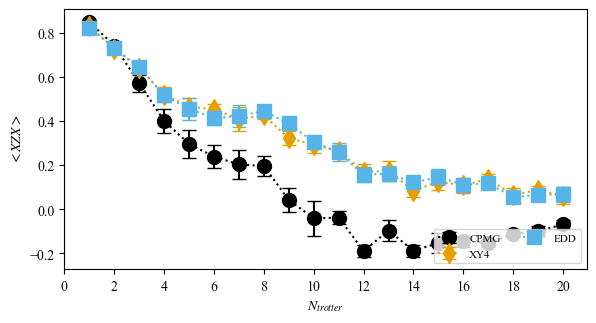

In [210]:
# plt.rcParams["figure.figsize"] = (10,7)
# plt.rcParams["figure.dpi"] = (200)
# plt.rcParams['xtick.labelsize'] = (12) 
# plt.rcParams['ytick.labelsize'] = (12)
# plt.rcParams["text.usetex"] = True

nt=21

DDs = ['CPMG','XY4','EDD']
cols = [colors[0], colors[1], colors[2]]
labls = [DDs[i]+" ${\chi}^2/[dof]$ = "+str.format('{0:.3f}', fits[i].chi2/(len(x))) for i in range(3)]


plt.figure(figsize=(3.37 * 2, 3.375))
# for i in range(3):
#     plt.annotate(labls[i], xy=(10.4,0.85-(0.15*i)),fontsize=11,color=cols[i])
            
            
# plt.fill_between(range(nt), gv.mean(cosine(range(0,nt),fit0.p))-
#                             gv.sdev(cosine(range(0,nt),fit0.p)), 
#                             gv.mean(cosine(range(0,nt),fit0.p))+
#                             gv.sdev(cosine(range(0,nt),fit0.p)),alpha=0.2, color=colors[0],label='CPMG Fit')
# plt.fill_between(range(nt), gv.mean(cosine(range(0,nt),fit1.p))-
#                             gv.sdev(cosine(range(0,nt),fit1.p)), 
#                             gv.mean(cosine(range(0,nt),fit1.p))+
#                             gv.sdev(cosine(range(0,nt),fit1.p)),alpha=0.2, color=colors[1],label='XY4 Fit')
# plt.fill_between(range(nt), gv.mean(cosine(range(0,nt),fit2.p))-
#                             gv.sdev(cosine(range(0,nt),fit2.p)), 
#                             gv.mean(cosine(range(0,nt),fit2.p))+
#                             gv.sdev(cosine(range(0,nt),fit2.p)),alpha=0.2, color=colors[2],label='EDD Fit')

print(scaledddcountsavg0)

plt.errorbar(range(1, nt), gv.mean(scaledddcountsavg0[:nt]), yerr=gv.sdev(scaledddcountsavg0[:nt]), 
             fmt='o', linestyle=':', markersize=10, 
             label='CPMG', capsize=5, color=colors[0])
plt.errorbar(range(1, nt), gv.mean(scaledddcountsavg1[:nt]), yerr=gv.sdev(scaledddcountsavg1[:nt]), 
             fmt='d', linestyle=':', markersize=10, 
             label='XY4', capsize=5, color=colors[1])
plt.errorbar(range(1, nt), gv.mean(scaledddcountsavg2[:nt]), yerr=gv.sdev(scaledddcountsavg2[:nt]), 
             fmt='s', linestyle=':', markersize=10, 
             label='EDD', capsize=5, color=colors[2])

# plt.ylim([0,  1.1])
plt.xlabel('$N_{trotter}$')
plt.xticks(np.arange(0, nt, step=2))  # Set label locations.
backend = str(backend)
# plt.title('Meson Correlation Function: '+str(backend).replace('_',' ')+' '+str(itl_layout),size=15)
plt.ylabel(r'$<XZX>$')
plt.legend(prop={'size': 8},loc='lower right', ncol=2)
# plt.show()
plt.savefig('rescaling' + str(backend)+str(itl_layout).replace(', ', '_') + '.pdf')
print('MCF' + str(backend)+str(itl_layout).replace(', ', '_') + '.pdf')